In [2]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from datetime import datetime
import plotly.express as px
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200

In [3]:
df = pd.read_excel("Loja_de_Informática.xlsx")


In [4]:
df.dtypes

Nota Fiscal               int64
Data             datetime64[ns]
Vendedor                 object
Gerente                  object
Matriz                   object
Comissão                 object
% Comissão              float64
Cidade/Estado            object
Região                   object
Produto                  object
Qtde                      int64
Preço                     int64
Total                     int64
dtype: object

Jogando a coluna Data para index ordenando por index

In [5]:
df2 = df.set_index('Data').sort_index()
df2.head(4)

,Nota Fiscal,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total
Data,,,,,,,,,,,,
2013-01-01,2110,Marina,Lucas,Belo Horizonte,Não,0.05,Varginha/MG,Sudeste,USB,17,8,136
2013-01-01,5511,Jorge,Daniella,Belo Horizonte,Sim,0.10,Rio de Janeiro/RJ,Sudeste,Mousepad Gamer,70,18,1260
2013-01-03,5516,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Goiânia/GO,Centro-Oeste,Mousepad,54,6,324
2013-01-03,5400,Deborah,Daniella,Sâo Paulo,Sim,0.10,Fortaleza/CE,Nordeste,Mousepad Gamer,79,18,1422


In [6]:
df.isna().sum()

Nota Fiscal      0
Data             0
Vendedor         0
Gerente          0
Matriz           0
Comissão         0
% Comissão       0
Cidade/Estado    0
Região           0
Produto          0
Qtde             0
Preço            0
Total            0
dtype: int64

In [7]:
df2.describe(include='all')

,Nota Fiscal,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total
count,5156.000000,5156,5156,5156,5156,5156.000000,5156,5156,5156,5156.000000,5156.000000,5156.000000
unique,NaN,10,3,3,2,NaN,20,5,10,NaN,NaN,NaN
top,NaN,Phelipe,Lucas,Sâo Paulo,Sim,NaN,Manaus/AM,Sudeste,Mouse Gamer,NaN,NaN,NaN
freq,NaN,545,2072,2088,3971,NaN,284,1791,580,NaN,NaN,NaN
mean,3797.500000,NaN,NaN,NaN,NaN,0.087859,NaN,NaN,NaN,52.727114,36.843483,1941.531614
std,1488.553325,NaN,NaN,NaN,NaN,0.021442,NaN,NaN,NaN,24.921024,29.299883,1935.531667
min,1220.000000,NaN,NaN,NaN,NaN,0.050000,NaN,NaN,NaN,10.000000,6.000000,60.000000
25%,2508.750000,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,31.000000,10.000000,529.500000
50%,3797.500000,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,53.000000,25.000000,1224.000000
75%,5086.250000,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,74.000000,60.000000,2765.000000


agrupando por Gerentes e matriz chego a soma e media 

In [8]:
df3 = df2.groupby(['Gerente','Matriz']).agg([np.sum, np.mean])
df3


Nota Fiscal              % Comissão             Qtde  \
                                sum         mean        sum      mean    sum   
Gerente  Matriz                                                                
Daniella Belo Horizonte     1834483  3774.656379      42.30  0.087037  25220   
         Curitibaa          1931495  3765.097466      45.25  0.088207  27044   
         Sâo Paulo          1983800  3757.196970      46.20  0.087500  27885   
David    Curitibaa          3985072  3842.885246      90.85  0.087608  54447   
         Sâo Paulo          1933168  3717.630769      45.40  0.087308  26823   
Lucas    Belo Horizonte     3943515  3821.235465      91.50  0.088663  54172   
         Sâo Paulo          3968377  3815.747115      91.50  0.087981  56270   

                                    Preço               Total               
                              mean    sum       mean      sum         mean  
Gerente  Matriz                                                             
Daniella Belo Horizonte  51.893004  19140  39.382716   997087  2051.619342  
         Curitibaa       52.717349  18421  35.908382  1000435  1950.165692  
         Sâo Paulo       52.812500  19834  37.564394  1039204  1968.189394  
David    Curitibaa       52.504339  37889  36.537126  1968017  1897.798457  
         Sâo Paulo       51.582692  19735  37.951923  1023649  1968.555769  
Lucas    Belo Horizonte  52.492248  37697  36.528101  1959474  1898.715116  
         Sâo Paulo       54.105769  37249  35.816346  2022671  1944.875962

In [9]:
df4 = df2.groupby(['Gerente','Região']).agg([np.sum, np.mean])
df4

Nota Fiscal              % Comissão             Qtde  \
                              sum         mean        sum      mean    sum   
Gerente  Região                                                              
Daniella Centro-Oeste     1229584  3760.195719      28.95  0.088532  17559   
         Nordeste          772734  3733.014493      18.15  0.087681  10741   
         Norte             840981  3822.640909      19.00  0.086364  11428   
         Sudeste          2047759  3820.445896      46.25  0.086287  27277   
         Sul               858720  3623.291139      21.40  0.090295  13144   
David    Centro-Oeste     1186446  3790.562300      27.70  0.088498  16608   
         Nordeste          852469  3627.527660      20.70  0.088085  12416   
         Norte             981354  3909.776892      21.95  0.087450  13206   
         Sudeste          1998504  3865.578337      45.55  0.088104  26770   
         Sul               899467  3732.228216      20.35  0.084440  12270   
Lucas    Centro-Oeste     1561106  3845.088670      35.90  0.088424  21691   
         Nordeste         1214230  3806.363636      28.05  0.087931  16983   
         Norte            1192725  3750.707547      28.05  0.088208  17268   
         Sudeste          2808363  3805.369919      65.40  0.088618  39041   
         Sul              1135468  3901.951890      25.60  0.087973  15459   

                                  Preço               Total               
                            mean    sum       mean      sum         mean  
Gerente  Região                                                           
Daniella Centro-Oeste  53.697248  12133  37.103976   648930  1984.495413  
         Nordeste      51.888889   8515  41.135266   432974  2091.661836  
         Norte         51.945455   8719  39.631818   463419  2106.450000  
         Sudeste       50.889925  19778  36.899254  1026399  1914.923507  
         Sul           55.459916   8250  34.810127   465004  1962.042194  
David    Centro-Oeste  53.060703  11222  35.853035   580344  1854.134185  
         Nordeste      52.834043   8172  34.774468   425278  1809.693617  
         Norte         52.613546   9576  38.151394   485018  1932.342629  
         Sudeste       51.779497  19315  37.359768  1025946  1984.421663  
         Sul           50.912863   9339  38.751037   475080  1971.286307  
Lucas    Centro-Oeste  53.426108  14972  36.876847   789088  1943.566502  
         Nordeste      53.238245  10439  32.724138   551067  1727.482759  
         Norte         54.301887  12083  37.996855   676270  2126.635220  
         Sudeste       52.901084  27407  37.136856  1457081  1974.364499  
         Sul           53.123711  10045  34.518900   508639  1747.900344

In [10]:
df5 = df2.groupby(['Gerente','Cidade/Estado']).agg([np.sum,np.mean])
df5

Nota Fiscal              % Comissão            \
                                    sum         mean        sum      mean   
Gerente  Cidade/Estado                                                      
Daniella Andradas/MG             330016  3837.395349       7.45  0.086628   
         Belo Horizonte/MG       271701  3881.442857       5.95  0.085000   
         Belém/PA                297339  3763.784810       6.75  0.085443   
         Campo Grande/MS         304022  3662.915663       7.20  0.086747   
         Cuiabá/MT               327243  3761.413793       7.60  0.087356   
         Curitiba/PR             290932  3591.753086       7.45  0.091975   
         Florianópolis/SC        283713  3502.629630       7.25  0.089506   
         Fortaleza/CE            266016  3644.054795       6.30  0.086301   
         Goiânia/GO              307752  3846.900000       7.15  0.089375   
         Maceió/AL               272852  3897.885714       6.25  0.089286   
         Manaus/AM               273645  4146.136364       5.70  0.086364   
         Palmas/TO               290567  3773.597403       7.00  0.090909   
         Porto Alegre/RS         284075  3787.666667       6.70  0.089333   
         Porto Velho/RO          269997  3599.960000       6.55  0.087333   
         Poços de Caldas/MG      331347  4090.703704       7.25  0.089506   
         Rio de Janeiro/RJ       244297  3817.140625       5.45  0.085156   
         Salvador/BA             233866  3654.156250       5.60  0.087500   
         São Paulo/SP            309738  3777.292683       6.95  0.084756   
         Varginha/MG             283301  3679.233766       6.60  0.085714   
         Vitória/ES              277359  3649.460526       6.60  0.086842   
David    Andradas/MG             281196  3799.945946       6.20  0.083784   
         Belo Horizonte/MG       308293  3759.670732       7.20  0.087805   
         Belém/PA                322882  3843.833333       7.10  0.084524   
         Campo Grande/MS         232190  3572.153846       5.65  0.086923   
         Cuiabá/MT               284934  3606.759494       6.90  0.087342   
         Curitiba/PR             278138  3708.506667       6.05  0.080667   
         Florianópolis/SC        324670  3959.390244       7.00  0.085366   
         Fortaleza/CE            271963  3531.987013       6.75  0.087662   
         Goiânia/GO              351449  3948.865169       7.90  0.088764   
         Maceió/AL               272746  3588.763158       7.10  0.093421   
         Manaus/AM               372879  4097.571429       7.90  0.086813   
         Palmas/TO               317873  3973.412500       7.25  0.090625   
         Porto Alegre/RS         296659  3531.654762       7.30  0.086905   
         Porto Velho/RO          285593  3757.802632       6.95  0.091447   
         Poços de Caldas/MG      248481  3764.863636       5.85  0.088636   
         Rio de Janeiro/RJ       264921  4075.707692       5.50  0.084615   
         Salvador/BA             307760  3753.170732       6.85  0.083537   
         São Paulo/SP            277239  3960.557143       6.45  0.092143   
         Varginha/MG             306252  3780.888889       7.35  0.090741   
         Vitória/ES              312122  3950.911392       7.00  0.088608   
Lucas    Andradas/MG             429600  3703.448276      10.65  0.091810   
         Belo Horizonte/MG       368890  3842.604167       8.50  0.088542   
         Belém/PA                354618  3813.096774       8.45  0.090860   
         Campo Grande/MS         411399  3706.297297      10.25  0.092342   
         Cuiabá/MT               377729  4018.393617       8.00  0.085106   
         Curitiba/PR             389806  3937.434343       8.85  0.089394   
         Florianópolis/SC        361354  3970.923077       8.05  0.088462   
         Fortaleza/CE            442519  3951.062500      10.00  0.089286   
         Goiânia/GO              407796  3811.177570       9.30  0.086916   
         Maceió/AL      

In [11]:
df2

,Nota Fiscal,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total
Data,,,,,,,,,,,,
2013-01-01,2110,Marina,Lucas,Belo Horizonte,Não,0.05,Varginha/MG,Sudeste,USB,17,8,136
2013-01-01,5511,Jorge,Daniella,Belo Horizonte,Sim,0.10,Rio de Janeiro/RJ,Sudeste,Mousepad Gamer,70,18,1260
2013-01-03,5516,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Goiânia/GO,Centro-Oeste,Mousepad,54,6,324
2013-01-03,5400,Deborah,Daniella,Sâo Paulo,Sim,0.10,Fortaleza/CE,Nordeste,Mousepad Gamer,79,18,1422
2013-01-04,4544,Jorge,Daniella,Belo Horizonte,Sim,0.10,Belo Horizonte/MG,Sudeste,Mousepad,36,6,216
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,4982,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Belo Horizonte/MG,Sudeste,Mousepad Gamer,47,18,846
2017-12-30,1232,Rodrigo,Daniella,Curitibaa,Sim,0.10,Maceió/AL,Nordeste,Placa de Vídeo,42,25,1050
2017-12-31,6045,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Poços de Caldas/MG,Sudeste,Monitor Gamer,93,70,6510


agrupado por gerentes observo quanto cada vendedor deles vendeu

In [12]:
df6 = df2.groupby('Gerente')['Vendedor'].value_counts()
df6

Gerente   Vendedor
Daniella  Deborah     528
          Rodrigo     513
          Jorge       486
David     Jéssica     528
          Edson       520
          Henrique    509
Lucas     Phelipe     545
          Ricardo     519
          Marina      513
          Ronaldo     495
Name: Vendedor, dtype: int64

da pra observa valor total das vendas de cada vendedor e quem sao os gerentes

In [13]:
df7 = df2.groupby(['Gerente','Vendedor'])['Total'].sum()
df7

Gerente   Vendedor
Daniella  Deborah     1039204
          Jorge        997087
          Rodrigo     1000435
David     Edson       1023649
          Henrique     975572
          Jéssica      992445
Lucas     Marina       977582
          Phelipe     1035095
          Ricardo      981892
          Ronaldo      987576
Name: Total, dtype: int64

In [14]:
df = df.filter(items=['Gerente','Total','Vendedor'],axis=1)
px.bar(df, x="Total",y=['Vendedor',"Gerente"],width=1350,height=600,color = 'Gerente')

In [15]:
df8 = pd.DataFrame(df7)
df9 = df8.reset_index()

In [16]:
px.bar(df9, x="Vendedor",y='Total',color='Gerente',width=1360,height=600, text_auto=True,barmode='relative')

podemos ver os produtos mas vendidos de cada gerente

In [17]:
df10 = df2.groupby('Gerente')['Produto'].value_counts()
df10

Gerente   Produto       
Daniella  Mouse Basic       170
          Mouse Gamer       170
          Placa de Vídeo    166
          Gabinete          160
          Teclado           155
          Monitor Gamer     149
          Mousepad Gamer    148
          Monitor Basic     146
          Mousepad          139
          USB               124
David     Mouse Gamer       196
          Monitor Basic     174
          Mousepad Gamer    158
          USB               156
          Mouse Basic       155
          Placa de Vídeo    149
          Gabinete          147
          Mousepad          147
          Teclado           139
          Monitor Gamer     136
Lucas     Placa de Vídeo    222
          Monitor Gamer     221
          Mousepad          220
          USB               216
          Mouse Gamer       214
          Gabinete          202
          Mousepad Gamer    201
          Teclado           198
          Mouse Basic       192
          Monitor Basic     186
Name: Produto, 

podemos ver a quantidade Preco e total de dinheiro da venda  de cada produto ordenado por qtde preco e total

In [18]:
df11= df2.groupby('Produto')['Qtde','Preço','Total'].sum()
print(df11.sort_values('Qtde',ascending=False))
print(df11.sort_values('Preço',ascending=False))
print(df11.sort_values('Total',ascending=False))

                 Qtde  Preço    Total
Produto                              
Mouse Gamer     31877   5800   318770
Placa de Vídeo  28055  13425   701375
Gabinete        27961  20360  1118440
Monitor Basic   26824  50600  2682400
Monitor Gamer   26619  35420  1863330
Mousepad Gamer  26534   9126   477612
Mouse Basic     26522  31010  1590530
USB             25955   3968   207640
Mousepad        25950   3036   155700
Teclado         25564  17220   894740
                 Qtde  Preço    Total
Produto                              
Monitor Basic   26824  50600  2682400
Monitor Gamer   26619  35420  1863330
Mouse Basic     26522  31010  1590530
Gabinete        27961  20360  1118440
Teclado         25564  17220   894740
Placa de Vídeo  28055  13425   701375
Mousepad Gamer  26534   9126   477612
Mouse Gamer     31877   5800   318770
USB             25955   3968   207640
Mousepad        25950   3036   155700
                 Qtde  Preço    Total
Produto                              
Monitor Basi

abrindo denovo arquivo so que com data como index 

In [39]:
df12 = pd.read_excel("Loja_de_Informática.xlsx",parse_dates =['Data'],index_col = 'Data')

In [40]:
data_time = df12['Total'].sort_index()

podemos ver total de dinheiro da venda de cada ano Simultaneamente

In [41]:
print(data_time['2013'].sum())
print(data_time['2014'].sum())
print(data_time['2015'].sum())
print(data_time['2016'].sum())
print(data_time['2017'].sum())

1980082
2022303
2099193
2002878
1906081


grafico da venda baseado por ano

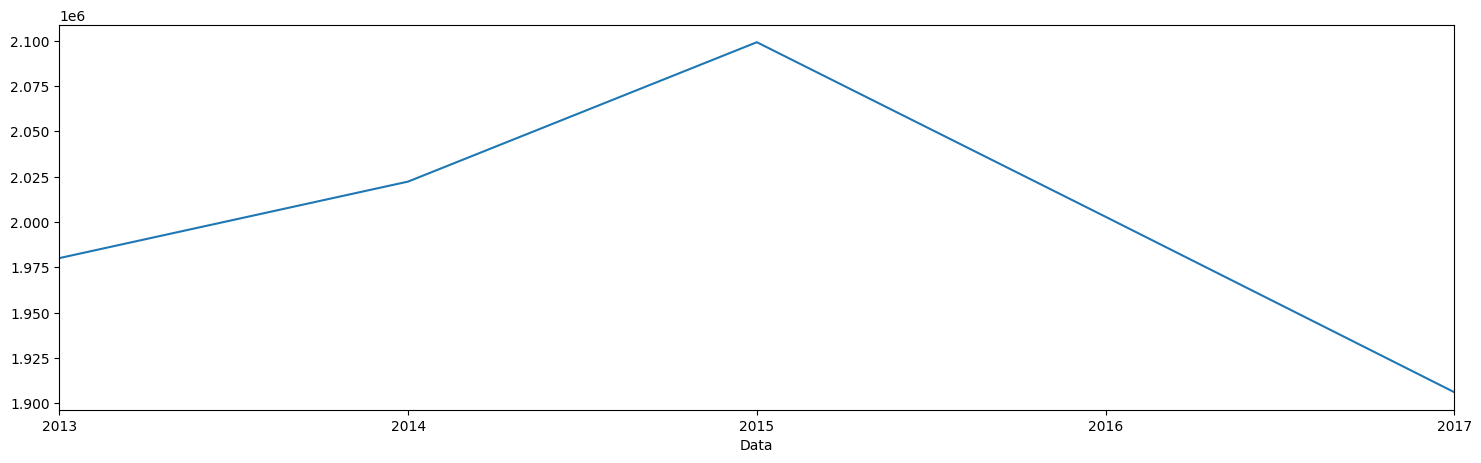

In [22]:
data_ano = data_time.resample('A').sum().plot(figsize=(18, 5))

grafico da venda baseado no mes

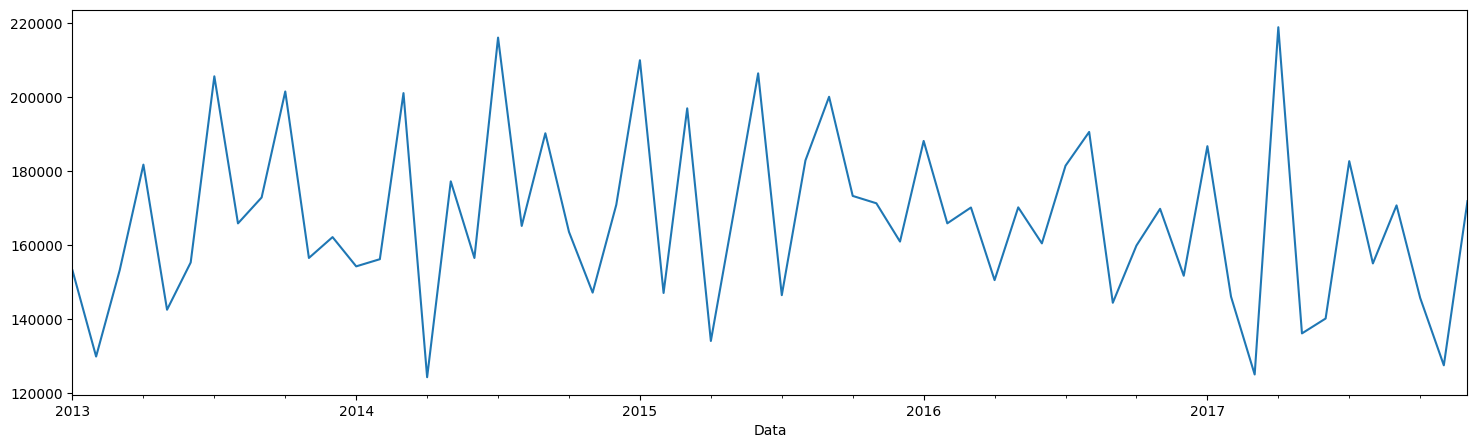

In [23]:
data_mes = data_time.resample('M').sum().plot(figsize=(18, 5))

grafico baseado nos dias de venda

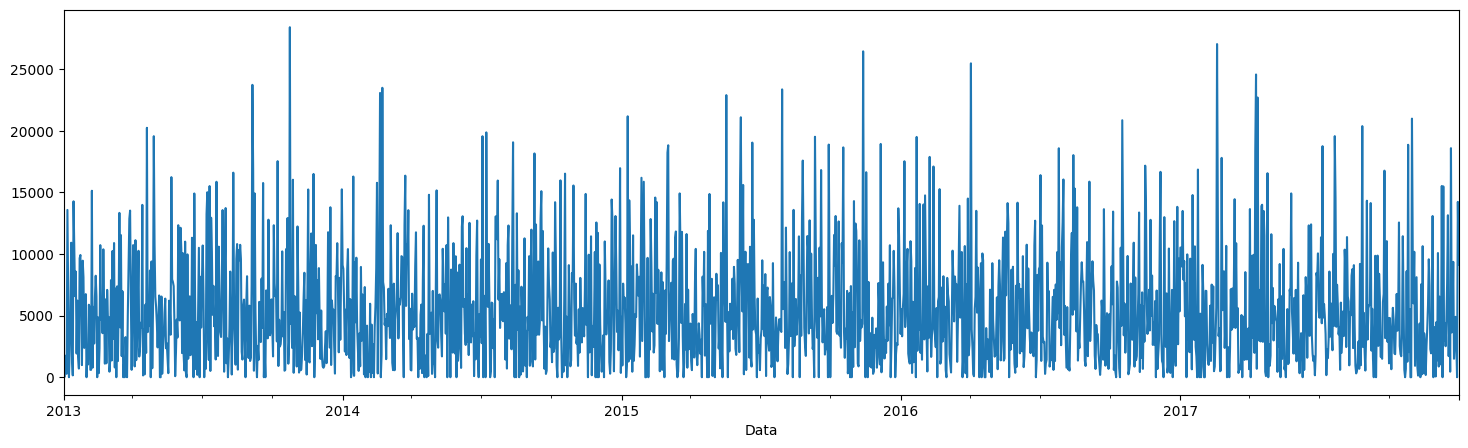

In [24]:
data_dia = data_time.resample('D').sum().plot(figsize=(18, 5))

grafico das vendas agrupado por meses 

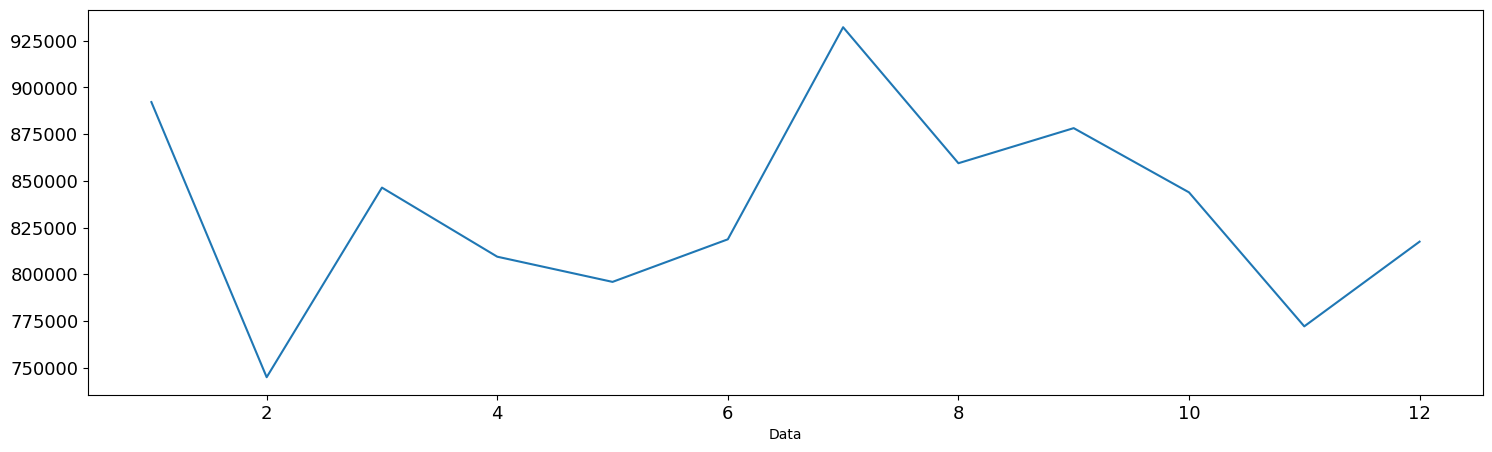

In [25]:
ts_mes = data_time.groupby([lambda x: x.month]).sum().plot(figsize=(18, 5),fontsize=13)

grafico das vendas agrupado pelo dia 

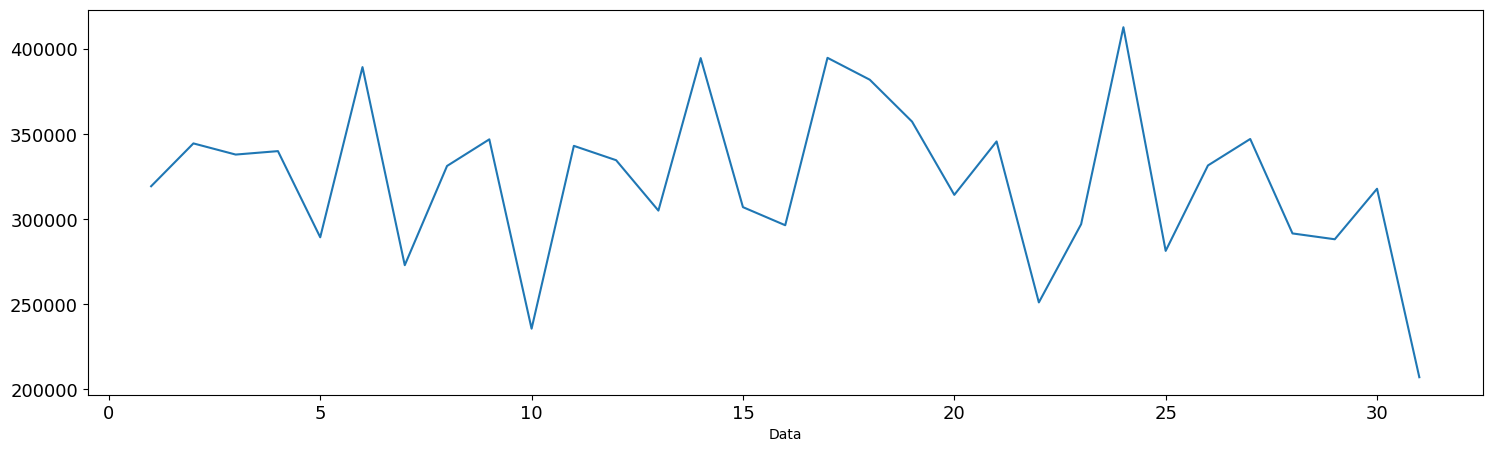

In [26]:
ts_mes = data_time.groupby([lambda x: x.day]).sum().plot(figsize=(18, 5),fontsize=13)

In [27]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


agrupado pelo mes podemos ver total de cada mes

In [28]:
arima = data_time.resample('M').sum()
arima

Data
2013-01-31    153124
2013-02-28    129807
2013-03-31    153236
2013-04-30    181736
2013-05-31    142470
2013-06-30    155256
2013-07-31    205632
2013-08-31    165834
2013-09-30    172850
2013-10-31    201535
2013-11-30    156479
2013-12-31    162123
2014-01-31    154206
2014-02-28    156145
2014-03-31    201089
2014-04-30    124207
2014-05-31    177211
2014-06-30    156473
2014-07-31    216111
2014-08-31    165144
2014-09-30    190219
2014-10-31    163522
2014-11-30    147102
2014-12-31    170874
2015-01-31    209981
2015-02-28    147005
2015-03-31    196967
2015-04-30    134018
2015-05-31    169957
2015-06-30    206433
2015-07-31    146413
2015-08-31    182871
2015-09-30    200094
2015-10-31    173267
2015-11-30    171275
2015-12-31    160912
2016-01-31    188147
2016-02-29    165851
2016-03-31    170134
2016-04-30    150487
2016-05-31    170173
2016-06-30    160424
2016-07-31    181438
2016-08-31    190582
2016-09-30    144355
2016-10-31    159841
2016-11-30    169779
2016-12-

In [29]:
decomposiçao = seasonal_decompose(arima)

In [30]:
tendencia = decomposiçao.trend
sazonal = decomposiçao.seasonal
aleatorio = decomposiçao.resid

plotando graficos original , tendencia dos dados , sazonalidade dos dados e aleatoridade dos dados

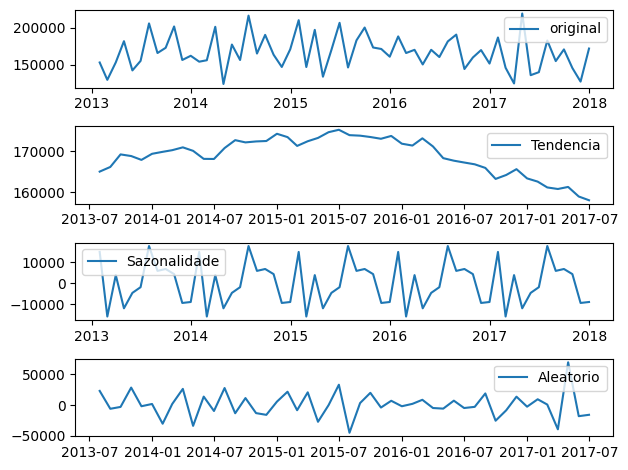

In [31]:
plt.subplot(4,1,1)
plt.plot(arima,label = 'original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia,label = 'Tendencia')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal,label = 'Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio,label = 'Aleatorio')
plt.legend(loc = 'best')
plt.tight_layout()

modelo arima para previsoes de 12 meses 

In [32]:
modelo_auto = auto_arima(arima, m = 12, seasonal = True, trace = False, method='lbfgs')

separando treino e teste

In [33]:
treino = arima.loc['2013-01-01':'2017-01-01']
teste = arima.loc['2017-01-01':]

treinando modelo

In [34]:
modelo_auto.fit(treino)

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

testando modelo

In [35]:
previsao_futuro = modelo_auto.predict(n_periods=12)
previsao_futuro

2017-01-31    178602.014434
2017-02-28    170783.168069
2017-03-31    169830.954084
2017-04-30    167709.757707
2017-05-31    170844.606625
2017-06-30    166923.824312
2017-07-31    174532.852269
2017-08-31    174428.012517
2017-09-30    164091.392933
2017-10-31    168265.270986
2017-11-30    170389.886709
2017-12-31    167237.000720
Freq: M, dtype: float64

In [36]:
previsao_futuro = pd.DataFrame(previsao_futuro,index=teste.index,columns=['Total'])

vendo resultado em grafico da performance do modelo linha azul dados real linha laranja previsoes modelo

<AxesSubplot:xlabel='Data'>

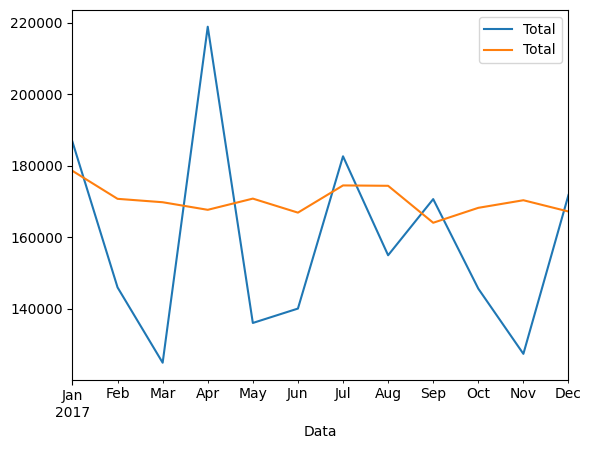

In [37]:
pd.concat([teste,previsao_futuro],axis=1).plot()

prevendo futuro 12 meses 

In [38]:
proximos_12 = auto_arima(arima, m = 12, seasonal = True, trace = False)
proximos_12_meses = proximos_12.predict(n_periods = 12)

proximos_12_meses 

2018-01-31    175046.702768
2018-02-28    162099.872906
2018-03-31    156922.881404
2018-04-30    182647.373565
2018-05-31    159482.837317
2018-06-30    162068.762376
2018-07-31    170562.647497
2018-08-31    163420.569109
2018-09-30    171121.785702
2018-10-31    162990.420386
2018-11-30    157399.182350
2018-12-31    170241.935975
Freq: M, dtype: float64